<a href="https://colab.research.google.com/github/Cr7stian8/testesIC/blob/main/TestesIC3_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

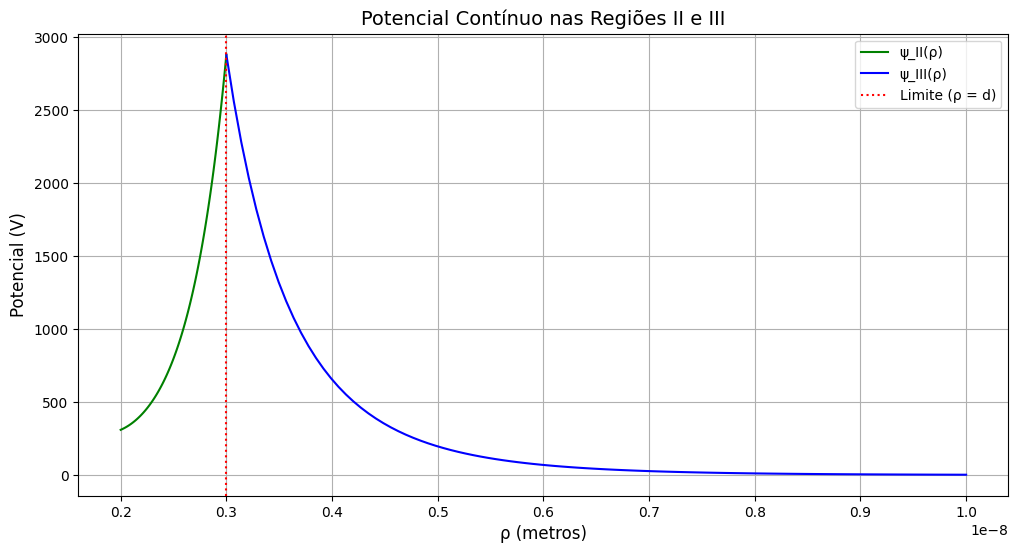

In [ ]:
from IPython.display import display, Math
from scipy.special import iv as I_m, kv as K_m
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Configuração da fonte para evitar avisos
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

# Parâmetros físicos
L = 10e-9                     # Periodicidade (metros)
c = (2 * np.pi) / L           # Número de onda
b = 2e-9                      # Raio inicial da Região II
d = 3e-9                      # Raio limite entre II e III
rho_limite = 10e-9            # Raio final da Região III
phi = 0                       # Ângulo azimutal
z = 0                         # Coordenada z
N = 6.02e23                   # Número de Avogadro
k_b = 1.3e23                  # Constante de Boltzmann (unidades consistentes)
E_t = 4.11e-21                # Energia térmica (k_B * T)
NM = 8e-6 * N                 # Concentração de sal (8 µM)
D = 78.54                     # Constante dielétrica da água
e = 1.6e-19                   # Carga elementar


psi_II = r"""
\psi_{II} = \sum_{r,r'=0}^1 \sum_{n,m=0}^\infty \cos \left( m \left( \phi + \frac{r'\pi}{2} \right) \right) \cos \left( n c \left( z + \frac{r\pi}{2} \right) \right) \left[ I_m(ncp) + K_m(ncp) \right]
"""

psi_III = r"""
\psi_{III} = \sum_{r,r'=0}^1 \sum_{m=0}^\infty \sum_{n=0}^\infty \cos \left( m \left( \phi + \frac{r'\pi}{2} \right) \right) \cos \left( nc \left( z + \frac{r\pi}{2} \right) \right) K_m(ncp)
"""

# Exibindo as equações renderizadas

display(Math(psi_II))
display(Math(psi_III))

# Parâmetro de Debye
k_Quadrado = (e**2 * 8 * np.pi**2 * NM) / (1000 * D * E_t)
k = np.sqrt(k_Quadrado)

# Cálculo do potencial na Região II
def calcular_psi_II(rho, m_max=5, n_max=5):
    soma = 0.0
    for r in [0, 1]:
        for r_linha in [0, 1]:
            for m in range(m_max + 1):
                for n in range(1, n_max + 1):
                    nc = n * c
                    cos_z = np.cos(nc * (z + r * np.pi / 2))
                    cos_phi = np.cos(m * (phi + r_linha * np.pi / 2))
                    arg = nc * rho
                    A_II = 1
                    F_II = 1
                    termo = cos_z * cos_phi * (A_II * I_m(m, arg) + F_II * K_m(m, arg))
                    soma += termo
    return soma

# Cálculo do potencial na Região III
def calcular_psi_III(rho, F_III, m_max=5, n_max=5):
    soma = 0.0
    for r in [0, 1]:
        for r_linha in [0, 1]:
            for m in range(m_max + 1):
                for n in range(1, n_max + 1):
                    nc = n * c
                    alfa = np.sqrt(nc**2 + k**2)
                    cos_z = np.cos(nc * (z + r * np.pi / 2))
                    cos_phi = np.cos(m * (phi + r_linha * np.pi / 2))
                    argumento = alfa * rho
                    termo = F_III * cos_phi * cos_z * K_m(m, argumento)
                    soma += termo
    return soma

# Garantir continuidade em rho = d (Condição de Dirichlet)
psi_II_d = calcular_psi_II(d)
psi_III_d_temp = calcular_psi_III(d, F_III=1)
F_III = psi_II_d / psi_III_d_temp

# Gerar dados para plotagem
rho_valores_II = np.linspace(b, d, 100)
psi_valores_II = [calcular_psi_II(rho) for rho in rho_valores_II]

rho_valores_III = np.linspace(d, rho_limite, 100)
psi_valores_III = [calcular_psi_III(rho, F_III) for rho in rho_valores_III]

# Plotando gráfico
plt.figure(figsize=(12, 6))
plt.plot(rho_valores_II, psi_valores_II, label='ψ_II(ρ)', color='green')
plt.plot(rho_valores_III, psi_valores_III, label='ψ_III(ρ)', color='blue')
plt.xlabel('ρ (metros)', fontsize=12)
plt.ylabel('Potencial (V)', fontsize=12)
plt.title('Potencial Contínuo nas Regiões II e III', fontsize=14)
plt.axvline(x=d, color='red', linestyle=':', label='Limite (ρ = d)')
plt.legend()
plt.grid(True)
plt.show()

<IPython.core.display.Math object>

<IPython.core.display.Math object>

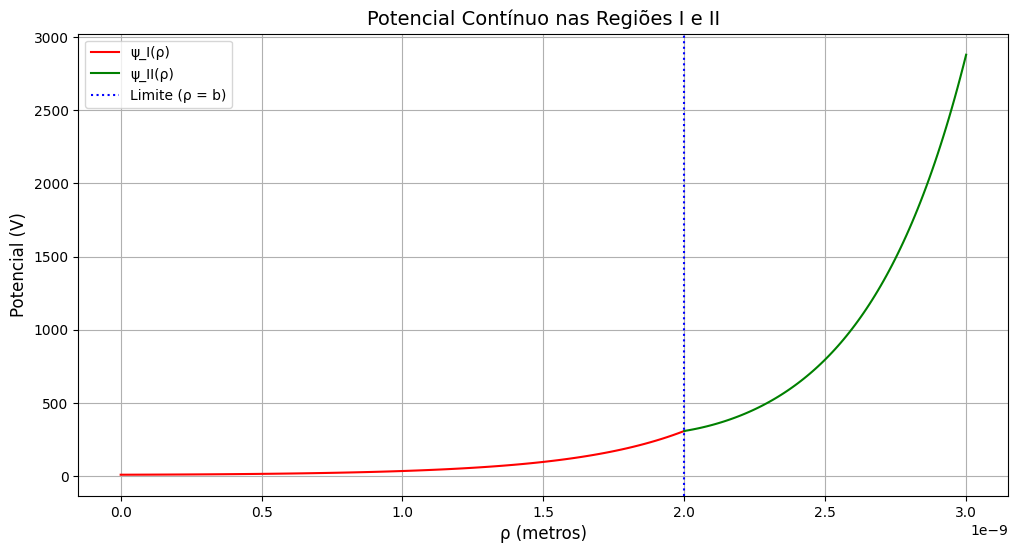

In [ ]:
from IPython.display import display, Math
from scipy.special import iv as I_m, kv as K_m
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Configuração da fonte para evitar avisos
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

# Parâmetros físicos
L = 10e-9                     # Periodicidade (metros)
c = (2 * np.pi) / L           # Número de onda
b = 2e-9                      # Raio inicial da Região II
d = 3e-9                      # Raio limite entre II e III
rho_limite = 10e-9            # Raio final da Região III
phi = 0                       # Ângulo azimutal
z = 0                         # Coordenada z
N = 6.02e23                   # Número de Avogadro
k_b = 1.3e23                  # Constante de Boltzmann (unidades consistentes)
E_t = 4.11e-21                # Energia térmica (k_B * T)
NM = 8e-6 * N                 # Concentração de sal (8 µM)
D = 78.54                     # Constante dielétrica da água
e = 1.6e-19                   # Carga elementar


psi_I = r"""
\begin{aligned}
    \psi_I &= \sum_{r=0, r'=1}^1 \sum_{m=0}^\infty \sum_{n=1}^\infty
    A_I \cos\left(nc\left(z + \frac{r\pi}{2}\right)\right)
    \cos\left(m\left(\phi + \frac{r'\pi}{2}\right)\right)
    I_m(nc\rho)+ \sum_{r=0}^1 \sum_{m=1}^\infty
    \cos\left(m\left(\phi + \frac{r\pi}{2}\right)\right)
    \rho^m
\end{aligned}
"""

psi_II = r"""
\psi_{II} = \sum_{r,r'=0}^1 \sum_{n,m=0}^\infty \cos \left( m \left( \phi + \frac{r'\pi}{2} \right) \right) \cos \left( n c \left( z + \frac{r\pi}{2} \right) \right) \left[ I_m(ncp) + K_m(ncp) \right]
"""

# Exibindo as equações renderizadas
display(Math(psi_I))
display(Math(psi_II))

# Parâmetro de Debye
k_Quadrado = (e**2 * 8 * np.pi**2 * NM) / (1000 * D * E_t)
k = np.sqrt(k_Quadrado)

# Cálculo do potencial na Região II
def calcular_psi_II(rho, m_max=5, n_max=5):
    soma = 0.0
    for r in [0, 1]:
        for r_linha in [0, 1]:
            for m in range(m_max + 1):
                for n in range(1, n_max + 1):
                    nc = n * c
                    cos_z = np.cos(nc * (z + r * np.pi / 2))
                    cos_phi = np.cos(m * (phi + r_linha * np.pi / 2))
                    arg = nc * rho
                    A_II = 1
                    F_II = 1
                    termo = cos_z * cos_phi * (A_II * I_m(m, arg) + F_II * K_m(m, arg))
                    soma += termo
    return soma

# Função para calcular ψ_I em função de rho
def calcular_psi_I(rho, F_I, m_max=5, n_max=5):
    soma = 0.0
    for r in [0, 1]:
        for r_linha in [0, 1]:
            for m in range(m_max + 1):
                for n in range(1, n_max + 1):
                    # Cálculo primeiro termo
                    cos_z = np.cos(n * c * (z + r * np.pi / 2))
                    cos_phi = np.cos(m * (phi + r_linha * np.pi / 2))
                    bessel = I_m(m, n * c * rho)
                    termo1 = F_I * cos_z * cos_phi * bessel
                    soma += termo1

    for r in [0, 1]:
        for m in range(1, m_max + 1):
            # Cálculo segundo termo
            cos_phi = np.cos(m * (phi + r * np.pi / 2))
            exp = rho**m
            termo2 = cos_phi * exp
            soma += termo2
    return soma

# Garantir continuidade em rho = b (Condição de Dirichlet)
psi_II_b = calcular_psi_II(b)
psi_I_b_temp = calcular_psi_I(b, F_I=1)
F_I = psi_II_b / psi_I_b_temp

# Gerar dados para plotagem
rho_valores_I = np.linspace(0, b, 100)
psi_valores_I = [calcular_psi_I(rho, F_I) for rho in rho_valores_I]

rho_valores_II = np.linspace(b, d, 100)
psi_valores_II = [calcular_psi_II(rho) for rho in rho_valores_II]

# Plotando gráfico
plt.figure(figsize=(12, 6))
plt.plot(rho_valores_I, psi_valores_I, label='ψ_I(ρ)', color='red')
plt.plot(rho_valores_II, psi_valores_II, label='ψ_II(ρ)', color='green')
plt.xlabel('ρ (metros)', fontsize=12)
plt.ylabel('Potencial (V)', fontsize=12)
plt.title('Potencial Contínuo nas Regiões I e II', fontsize=14)
plt.axvline(x=b, color='blue', linestyle=':', label='Limite (ρ = b)')
plt.legend()
plt.grid(True)
plt.show()

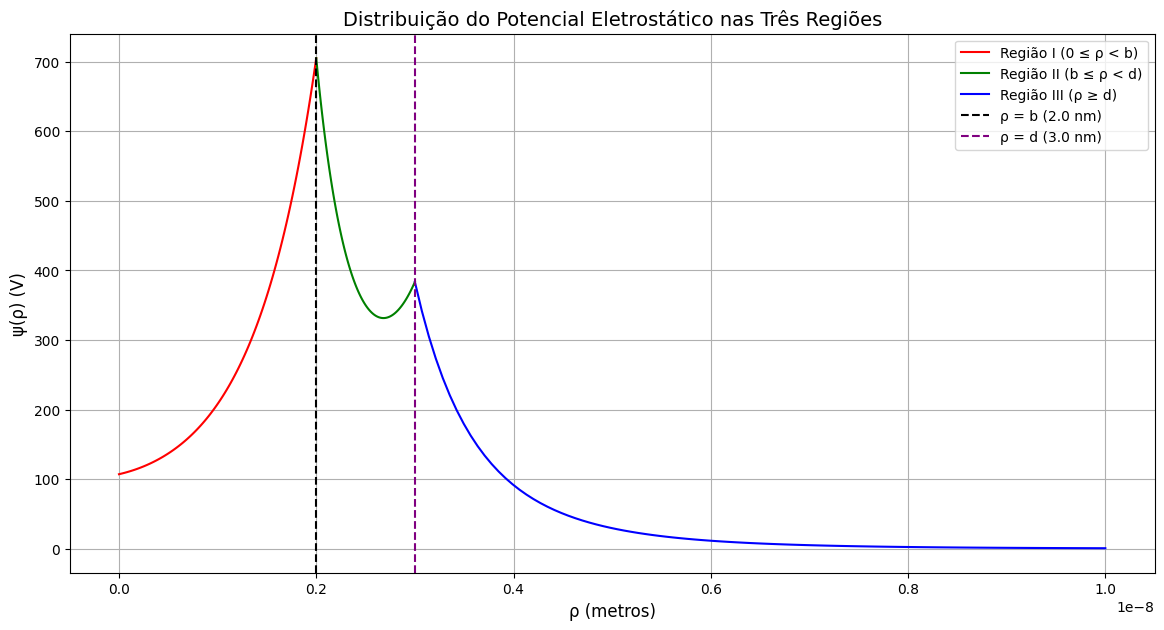

In [19]:
from IPython.display import display, Math
from scipy.special import iv as I_m, kv as K_m
import numpy as np
import matplotlib.pyplot as plt

# Configuração da fonte
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']

# Parâmetros físicos
L = 18e-9                     # Periodicidade (metros)
c = (2 * np.pi) / L           # Número de onda
b = 2e-9                      # Raio inicial da Região II
d = 3e-9                      # Raio limite entre II e III
rho_limite = 10e-9            # Raio final da Região III
phi = 0                       # Ângulo azimutal
z = 0                         # Coordenada z
N = 6.02e23                   # Número de Avogadro
k_b = 1.3e23                  # Constante de Boltzmann (unidades consistentes)
E_t = 4.11e-21                # Energia térmica (k_B * T)
NM = 8e-6 * N                 # Concentração de sal (8 µM)
D = 78.54                     # Constante dielétrica da água
e = 1.6e-19                   # Carga elementar

# Parâmetro de Debye
k_Quadrado = (e**2 * 8 * np.pi**2 * NM) / (1000 * D * E_t)
k = np.sqrt(k_Quadrado)

# Funções de cálculo para cada região
def calcular_psi_I(rho, F_I, m_max=5, n_max=5):
    soma = 0.0
    # Primeira soma da equação
    for r in [0, 1]:
        for r_linha in [0, 1]:
            for m in range(m_max + 1):
                for n in range(1, n_max + 1):
                    nc = n * c
                    cos_z = np.cos(nc * (z + r * np.pi / 2))
                    cos_phi = np.cos(m * (phi + r_linha * np.pi / 2))
                    termo = F_I * cos_z * cos_phi * I_m(m, nc * rho)
                    soma += termo
    # Segunda soma da equação
    for r in [0, 1]:
        for m in range(1, m_max + 1):
            cos_phi = np.cos(m * (phi + r * np.pi / 2))
            termo = cos_phi * (rho**m)
            soma += termo
    return soma

def calcular_psi_II(rho, m_max=5, n_max=5):
    soma = 0.0
    for r in [0, 1]:
        for r_linha in [0, 1]:
            for m in range(m_max + 1):
                for n in range(1, n_max + 1):
                    nc = n * c
                    cos_z = np.cos(nc * (z + r * np.pi / 2))
                    cos_phi = np.cos(m * (phi + r_linha * np.pi / 2))
                    arg = nc * rho
                    termo = cos_z * cos_phi * (I_m(m, arg) + K_m(m, arg))
                    soma += termo
    return soma

def calcular_psi_III(rho, F_III, m_max=5, n_max=5):
    soma = 0.0
    for r in [0, 1]:
        for r_linha in [0, 1]:
            for m in range(m_max + 1):
                for n in range(1, n_max + 1):
                    nc = n * c
                    alfa = np.sqrt(nc**2 + k**2)
                    cos_z = np.cos(nc * (z + r * np.pi / 2))
                    cos_phi = np.cos(m * (phi + r_linha * np.pi / 2))
                    termo = F_III * cos_phi * cos_z * K_m(m, alfa * rho)
                    soma += termo
    return soma

# Cálculo das constantes de continuidade
# Entre I e II em rho = b
psi_II_b = calcular_psi_II(b)
psi_I_b_temp = calcular_psi_I(b, F_I=1)
F_I = psi_II_b / psi_I_b_temp

# Entre II e III em rho = d
psi_II_d = calcular_psi_II(d)
psi_III_d_temp = calcular_psi_III(d, F_III=1)
F_III = psi_II_d / psi_III_d_temp

# Geração de dados
rho_I = np.linspace(0, b, 100)
rho_II = np.linspace(b, d, 100)
rho_III = np.linspace(d, rho_limite, 100)

psi_I = [calcular_psi_I(r, F_I) for r in rho_I]
psi_II = [calcular_psi_II(r) for r in rho_II]
psi_III = [calcular_psi_III(r, F_III) for r in rho_III]

# Plotagem unificada
plt.figure(figsize=(14, 7))
plt.plot(rho_I, psi_I, color='red', label='Região I (0 ≤ ρ < b)')
plt.plot(rho_II, psi_II, color='green', label='Região II (b ≤ ρ < d)')
plt.plot(rho_III, psi_III, color='blue', label='Região III (ρ ≥ d)')

plt.axvline(x=b, color='black', linestyle='--', label=f'ρ = b ({b*1e9:.1f} nm)')
plt.axvline(x=d, color='purple', linestyle='--', label=f'ρ = d ({d*1e9:.1f} nm)')

plt.title('Distribuição do Potencial Eletrostático nas Três Regiões', fontsize=14)
plt.xlabel('ρ (metros)', fontsize=12)
plt.ylabel('ψ(ρ) (V)', fontsize=12)
plt.legend()
plt.grid(True)
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.show()

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.special import iv as I_m, kv as K_m
from IPython.display import HTML

# Parâmetros físicos fixos
b = 2e-9                      # Raio inicial da Região II
d = 3e-9                      # Raio limite entre II e III
rho_limite = 10e-9            # Raio final da Região III
phi = 0                       # Ângulo azimutal
z = 0                         # Coordenada z
N = 6.02e23                   # Número de Avogadro
E_t = 4.11e-21                # Energia térmica
NM = 8e-6 * N                 # Concentração de sal
D = 78.54                     # Constante dielétrica da água
e = 1.6e-19                   # Carga elementar

# Parâmetro de Debye (fixo)
k_Quadrado = (e**2 * 8 * np.pi**2 * NM) / (1000 * D * E_t)
k = np.sqrt(k_Quadrado)

# Funções de cálculo para cada região (otimizadas)
def calcular_psi_I(rho, F_I, c, m_max=2, n_max=2):
    soma = 0.0
    nc = np.arange(1, n_max+1) * c
    for m in range(m_max + 1):
        for n in range(n_max):
            termo = F_I * np.cos(nc[n] * z) * np.cos(m * phi) * I_m(m, nc[n] * rho)
            soma += termo
    for m in range(1, m_max + 1):
        soma += np.cos(m * phi) * (rho**m)
    return soma

def calcular_psi_II(rho, c, m_max=2, n_max=2):
    soma = 0.0
    nc = np.arange(1, n_max+1) * c
    for m in range(m_max + 1):
        for n in range(n_max):
            arg = nc[n] * rho
            termo = np.cos(nc[n] * z) * np.cos(m * phi) * (I_m(m, arg) + K_m(m, arg))
            soma += termo
    return soma

def calcular_psi_III(rho, F_III, c, m_max=2, n_max=2):
    soma = 0.0
    nc = np.arange(1, n_max+1) * c
    for m in range(m_max + 1):
        for n in range(n_max):
            alfa = np.sqrt(nc[n]**2 + k**2)
            termo = F_III * np.cos(m * phi) * np.cos(nc[n] * z) * K_m(m, alfa * rho)
            soma += termo
    return soma

# Configuração da figura
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_xlim(0, rho_limite)
ax.set_xlabel('ρ (m)')
ax.set_ylabel('ψ(ρ) (V)')
ax.grid(True)

# Inicialização das linhas
line_I, = ax.plot([], [], 'r-', label='Região I')
line_II, = ax.plot([], [], 'g-', label='Região II')
line_III, = ax.plot([], [], 'b-', label='Região III')
ax.axvline(b, color='k', linestyle='--', label=f'b = {b*1e9:.1f} nm')
ax.axvline(d, color='purple', linestyle='--', label=f'd = {d*1e9:.1f} nm')
ax.legend()

# Texto para mostrar o valor de L
text_L = ax.text(0.02, 0.95, '', transform=ax.transAxes)

# Valores de L para animação
L_values = np.linspace(1e-9, 35e-9, 50)

def init():
    line_I.set_data([], [])
    line_II.set_data([], [])
    line_III.set_data([], [])
    text_L.set_text('')
    return line_I, line_II, line_III, text_L

def update(frame):
    L = L_values[frame]
    c = (2 * np.pi) / L

    # Calcular constantes
    psi_II_b = calcular_psi_II(b, c)
    psi_I_b = calcular_psi_I(b, 1, c)
    F_I = psi_II_b / psi_I_b if psi_I_b != 0 else 0

    psi_II_d = calcular_psi_II(d, c)
    psi_III_d = calcular_psi_III(d, 1, c)
    F_III = psi_II_d / psi_III_d if psi_III_d != 0 else 0

    # Calcular pontos
    rho_I = np.linspace(0, b, 50)
    rho_II = np.linspace(b, d, 50)
    rho_III = np.linspace(d, rho_limite, 50)

    psi_I_vals = [calcular_psi_I(r, F_I, c) for r in rho_I]
    psi_II_vals = [calcular_psi_II(r, c) for r in rho_II]
    psi_III_vals = [calcular_psi_III(r, F_III, c) for r in rho_III]

    # Atualizar dados
    line_I.set_data(rho_I, psi_I_vals)
    line_II.set_data(rho_II, psi_II_vals)
    line_III.set_data(rho_III, psi_III_vals)

    # Ajustar eixo y
    all_psi = psi_I_vals + psi_II_vals + psi_III_vals
    y_min, y_max = min(all_psi), max(all_psi)
    ax.set_ylim(y_min - 0.1*abs(y_min), y_max + 0.1*abs(y_max))

    # Atualizar texto
    text_L.set_text(f'L = {L*1e9:.1f} nm')

    return line_I, line_II, line_III, text_L

# Criar animação
ani = FuncAnimation(fig, update, frames=len(L_values),
                    init_func=init, blit=True, interval=200)

# Para exibir no Jupyter Notebook
plt.close()
HTML(ani.to_jshtml())